## Data Preparation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
data = sns.load_dataset('diamonds')

In [3]:
print(data.head(10))
print(f'Nullvalues: {data.isnull().values.any()}')

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
Nullvalues: False


In [5]:
# identify unique values for encoding
print(data['clarity'].unique())
print(data['cut'].unique())
print(data['color'].unique())

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']


In [7]:
#ordinal encoding for clarity and cut
from sklearn.preprocessing import OrdinalEncoder

encoder_cut = OrdinalEncoder(categories=[['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']])
data['cut'] = encoder_cut.fit_transform(data[['cut']])

encoder_clarity = OrdinalEncoder(categories=[['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']])
data['clarity'] = encoder_clarity.fit_transform(data[['clarity']])

data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.0,E,6.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1.0,E,5.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3.0,E,3.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1.0,I,4.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3.0,J,6.0,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2.0,J,2.0,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2.0,I,1.0,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2.0,H,5.0,61.9,55.0,337,4.07,4.11,2.53
8,0.22,4.0,E,4.0,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2.0,H,3.0,59.4,61.0,338,4.00,4.05,2.39


In [9]:
#encoding of color
import pandas as pd
data = pd.get_dummies(data, columns=['color'], drop_first=True)
data.head(10)

,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,0.0,6.0,61.5,55.0,326,3.95,3.98,2.43,True,False,False,False,False,False
1,0.21,1.0,5.0,59.8,61.0,326,3.89,3.84,2.31,True,False,False,False,False,False
2,0.23,3.0,3.0,56.9,65.0,327,4.05,4.07,2.31,True,False,False,False,False,False
3,0.29,1.0,4.0,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,True,False
4,0.31,3.0,6.0,63.3,58.0,335,4.34,4.35,2.75,False,False,False,False,False,True
5,0.24,2.0,2.0,62.8,57.0,336,3.94,3.96,2.48,False,False,False,False,False,True
6,0.24,2.0,1.0,62.3,57.0,336,3.95,3.98,2.47,False,False,False,False,True,False
7,0.26,2.0,5.0,61.9,55.0,337,4.07,4.11,2.53,False,False,False,True,False,False
8,0.22,4.0,4.0,65.1,61.0,337,3.87,3.78,2.49,True,False,False,False,False,False
9,0.23,2.0,3.0,59.4,61.0,338,4.00,4.05,2.39,False,False,False,True,False,False


In [13]:
X = data.drop(['clarity'], axis = 1)
y = data['clarity']

In [15]:
#divide in train, test and val
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(f'train: {X_train.shape}, {y_train.shape}')
print(f'test: {X_test.shape}, {y_test.shape}')
print(f'val: {X_val.shape}, {y_val.shape}')

train: (37758, 14), (37758,)
test: (8091, 14), (8091,)
val: (8091, 14), (8091,)


In [17]:
#mean and std for normalisation
X_train_means = X_train.mean()
X_train_std = X_train.std()

In [19]:
#Normalize data
X_train = (X_train - X_train_means) / X_train_std
X_test = (X_test - X_train_means) / X_train_std
X_val = (X_val - X_train_means) / X_train_std

In [21]:
X_train.head()

,carat,cut,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
47012,-0.420352,-0.090170,0.658808,0.234715,-0.531695,-0.351200,-0.320556,-0.259060,2.132518,-0.462643,-0.513878,-0.426919,-0.337735,-0.235244
28461,-1.009521,0.803432,0.381250,-0.654562,-0.817615,-1.232057,-1.191305,-1.177537,-0.468917,-0.462643,-0.513878,2.342300,-0.337735,-0.235244
47651,-1.198896,-0.983771,0.728198,-0.209924,-0.853013,-1.623548,-1.548313,-1.536318,2.132518,-0.462643,-0.513878,-0.426919,-0.337735,-0.235244
23078,1.557569,-0.090170,0.034303,0.679353,1.783591,1.410512,1.420944,1.434384,-0.468917,-0.462643,1.945935,-0.426919,-0.337735,-0.235244
7544,-0.209935,-0.983771,-0.104476,-0.654562,0.073301,0.111472,-0.024501,-0.043791,-0.468917,2.161435,-0.513878,-0.426919,-0.337735,-0.235244


In [23]:
# überprüfen
print(X_train.mean(), X_train.std())

carat      1.670127e-17
cut       -6.247688e-17
depth      3.993627e-15
table      2.096739e-15
price      2.314655e-17
x          1.385030e-16
y          7.028649e-16
z          9.334836e-16
color_E    5.513772e-17
color_F    7.075694e-17
color_G   -5.363226e-17
color_H   -4.855131e-17
color_I    7.715518e-17
color_J    7.357969e-17
dtype: float64 carat      1.0
cut        1.0
depth      1.0
table      1.0
price      1.0
x          1.0
y          1.0
z          1.0
color_E    1.0
color_F    1.0
color_G    1.0
color_H    1.0
color_I    1.0
color_J    1.0
dtype: float64


### Part 2 Building decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3)  
model2 = DecisionTreeClassifier(max_depth=7)  
model3 = DecisionTreeClassifier(max_depth=15)  

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

y_pred1 = model1.predict(X_val)
y_pred2 = model2.predict(X_val)
y_pred3 = model3.predict(X_val)

In [27]:
# visulalizing
from sklearn import tree
with open("model1.txt", "w") as f:
    f.write(tree.export_text(model1))

with open("model2.txt", "w") as f:
    f.write(tree.export_text(model2))

with open("model3.txt", "w") as f:
    f.write(tree.export_text(model3))

In [29]:
from sklearn.metrics import accuracy_score

print('accuracy on val:')
print(accuracy_score(y_pred1, y_val))
print(accuracy_score(y_pred2, y_val))
print(accuracy_score(y_pred3, y_val))

print('accuracy on train:')
print(accuracy_score(model1.predict(X_train), y_train))
print(accuracy_score(model2.predict(X_train), y_train))
print(accuracy_score(model3.predict(X_train), y_train))

accuracy on val:
0.32159189222593004
0.42862439747868003
0.6074650846619701
accuracy on train:
0.31823719476667195
0.43479527517347316
0.822421738439536


## Adding Noise to dataset

In [31]:
import numpy as np
noise = np.random.uniform(-0.1, 0.1, size=X_train.shape)

In [36]:
X_train_noise = X_train + noise

In [38]:
#modeling
model1_noise = DecisionTreeClassifier(max_depth=3)  
model2_noise = DecisionTreeClassifier(max_depth=7)  
model3_noise = DecisionTreeClassifier(max_depth=15)  

model1_noise.fit(X_train_noise, y_train)
model2_noise.fit(X_train_noise, y_train)
model3_noise.fit(X_train_noise, y_train)

y_pred1_noise = model1_noise.predict(X_val)
y_pred2_noise = model2_noise.predict(X_val)
y_pred3_noise = model3_noise.predict(X_val)

#accuracy
print('accuracy on val:')
print(accuracy_score(y_pred1_noise, y_val))
print(accuracy_score(y_pred2_noise, y_val))
print(accuracy_score(y_pred3_noise, y_val))

print('accuracy on train:')
print(accuracy_score(model1.predict(X_train_noise), y_train))
print(accuracy_score(model2.predict(X_train_noise), y_train))
print(accuracy_score(model3.predict(X_train_noise), y_train))

accuracy on val:
0.31306389815844765
0.4113212211098752
0.43727598566308246
accuracy on train:
0.2999099528576725
0.3527199533873616
0.3962868796016738


In [40]:
#visualize
with open("model1_noise.txt", "w") as f:
    f.write(tree.export_text(model1_noise))

with open("model2_noise.txt", "w") as f:
    f.write(tree.export_text(model2_noise))

with open("model3_noise.txt", "w") as f:
    f.write(tree.export_text(model3_noise))

## Noise Reduction using PCA

In [43]:
X_train_noise

,carat,cut,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
47012,-0.417841,-0.086606,0.676502,0.235308,-0.455439,-0.361331,-0.377437,-0.303587,2.135513,-0.396377,-0.524346,-0.421787,-0.414895,-0.267466
28461,-0.914279,0.781753,0.451960,-0.601801,-0.820359,-1.241640,-1.263954,-1.221392,-0.536501,-0.454670,-0.537142,2.357927,-0.410529,-0.243726
47651,-1.295903,-0.992526,0.727774,-0.267483,-0.781945,-1.684307,-1.570360,-1.635417,2.106152,-0.557197,-0.426031,-0.463460,-0.299183,-0.321032
23078,1.652901,-0.098717,0.025528,0.753393,1.832601,1.482786,1.403224,1.451292,-0.460074,-0.431937,2.017952,-0.449556,-0.258131,-0.200691
7544,-0.188893,-1.075873,-0.196952,-0.589860,0.094384,0.032581,-0.014778,-0.123290,-0.444180,2.201415,-0.580530,-0.410414,-0.401451,-0.253144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34393,-0.942770,-1.079600,0.005190,-1.544263,-0.759431,-1.024498,-1.094205,-1.070315,-0.534595,-0.561804,1.883267,-0.349187,-0.402905,-0.258679
53018,-0.127581,0.769906,0.175312,1.966620,-0.308950,-0.051558,0.012440,0.028501,-0.448159,-0.450767,1.895491,-0.352016,-0.240952,-0.151721
13735,-1.014961,-1.065525,0.036091,-0.795132,-0.891690,-1.239938,-1.082001,-1.093649,-0.510708,-0.484188,1.967151,-0.402237,-0.247078,-0.317517
13015,0.673620,0.896614,0.356887,1.096722,0.364503,0.756057,0.929534,0.937467,-0.500031,-0.485537,-0.548569,-0.347939,-0.373602,-0.275269


In [45]:
from sklearn.decomposition import PCA
X = X_train_noise
PCA = PCA(n_components=2)

X_pca = PCA.fit_transform(X)

In [47]:
X_pca.shape

(37758, 2)

In [49]:
X_pca

array([[-1.04193858,  0.63403378],
       [-2.26909695,  0.04496282],
       [-3.38919142, -0.10809478],
       ...,
       [-2.54541902, -1.58481871],
       [ 1.78857881,  1.05346206],
       [ 1.81178601,  0.50149855]])

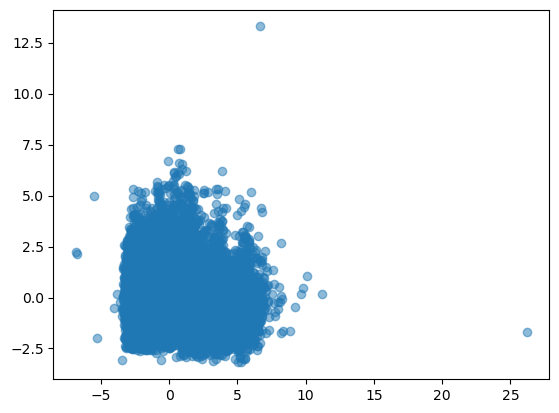

In [51]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

## Build Decision Tree on denoised data

In [54]:
model_pca = DecisionTreeClassifier(max_depth=15)

model_pca.fit(X_pca, y_train)

y_pred_pca = model_pca.predict(X_pca)

In [56]:
accuracy_score(y_pred_pca, y_train)

0.4838709677419355

accuracy on train:
0.299962921764924 \
0.35510355421367656\
0.3902219397213835

### Lab Note on Noise
Noise can be benificial for DecisionTree Accuracy (around 10%, as did before, even though it didn't work)